# Sephora Product Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_products=pd.read_csv('./product_info.csv')

### Understanding the Data

In [4]:
df_products.info()
df_products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


### Descriptive Anlaysis

In [6]:
# Descriptive statistics:
# Ratings
ratings_descriptive= df_products['rating'].describe()
ratings_descriptive


count    8216.000000
mean        4.194513
std         0.516694
min         1.000000
25%         3.981725
50%         4.289350
75%         4.530525
max         5.000000
Name: rating, dtype: float64

Average rating across products is 4.2. Ratings range from 1.0 to 5.0, with most products falling between 3.9 and 4.5.

---

In [9]:
# Price
price_descriptive= df_products['price_usd'].describe()

price_descriptive


count    8494.000000
mean       51.655595
std        53.669234
min         3.000000
25%        25.000000
50%        35.000000
75%        58.000000
max      1900.000000
Name: price_usd, dtype: float64

Average price across products is \$51.66 . Price range from 3.0 to 1900.0, with most products falling between 25.0 and 58.0.

---

**To analyze how ratings affect the number of favorites for a product, we only need a few specific columns from the original DataFrame. Therefore, I created a subset of the DataFrame containing only the required columns for this analysis.**


In [13]:
df_prodsubset= df_products[['product_id','product_name','brand_id','brand_name','loves_count','rating']]

##### initializing the new subset as a DataFrame

df_prodsubset=pd.DataFrame(df_prodsubset)


Checking for missing or null values in the DataFrame

In [15]:
df_prodsubset.isnull().sum()

product_id        0
product_name      0
brand_id          0
brand_name        0
loves_count       0
rating          278
dtype: int64

Since the proportion of missing values in the rating column is low relative to the total number of rows in the DataFrame, I have decided to remove the rows with missing values in that column.


In [17]:
df_prodsubset.dropna(subset=['rating'], inplace=True)
df_prodsubset.isnull().sum()

product_id      0
product_name    0
brand_id        0
brand_name      0
loves_count     0
rating          0
dtype: int64

---
No data type conversions are necessary as the existing types appear to be correct.
Proceeding to check for duplicates

In [19]:
duplicate_df=df_prodsubset.duplicated().sum()
print(duplicate_df)

0


---
Correcting any improperly formatted values in the DataFrame

In [21]:
df_prodsubset['product_name'] = df_prodsubset['product_name'].str.title()
df_prodsubset['brand_name'] = df_prodsubset['brand_name'].str.title()
df_prodsubset.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364
1,P473668,La Habana Eau De Parfum,6342,19-69,3827,4.1538
2,P473662,Rainbow Bar Eau De Parfum,6342,19-69,3253,4.2500
3,P473660,Kasbah Eau De Parfum,6342,19-69,3018,4.4762
4,P473658,Purple Haze Eau De Parfum,6342,19-69,2691,3.2308


---

## Analysis:


### Analysis 1: Histogram Analysis of Product Ratings

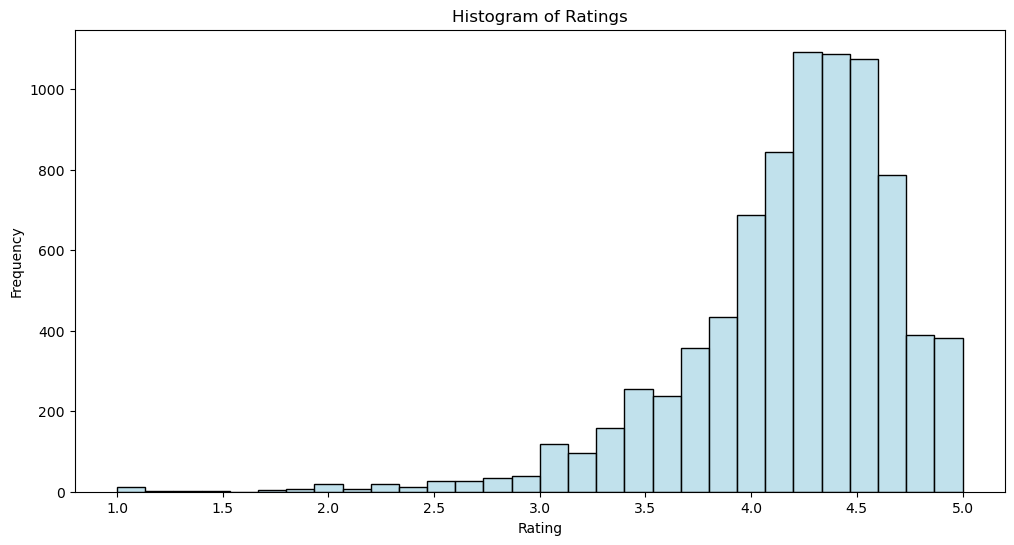

In [74]:
# Plot histogram and density plot for the 'rating' column
plt.figure(figsize=(12, 6))
sns.histplot(df_prodsubset['rating'], bins=30, color='lightblue')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('histogram of product ratings.png')
plt.show()

In this analysis, the distribution of product ratings are spread across different values.

### Interpretation

The histogram shows a right-skewed distribution, with the majority of reviews clustering between 4.0 and 4.5, indicating that most products are highly rated, while very few ratings fall below 3.0.



---

### Analysis 2: Price vs Rating

In [29]:
df_pricerating=df_products[['price_usd','rating']]
df_pricerating=df_pricerating.copy()
df_pricerating.dropna(subset='rating', inplace=True)

df_pricerating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8216 entries, 0 to 8491
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_usd  8216 non-null   float64
 1   rating     8216 non-null   float64
dtypes: float64(2)
memory usage: 192.6 KB


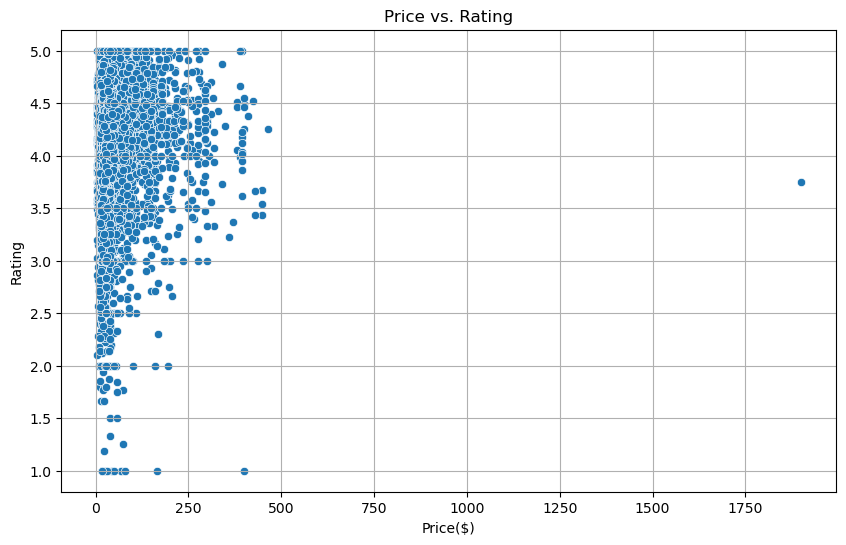

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x ='price_usd', y='rating', data=df_pricerating)

# Plot customization
plt.title('Price vs. Rating')
plt.xlabel('Price($)')
plt.ylabel('Rating')
plt.grid(True)
plt.savefig('Scatter plot of Price vs ratings.png')

plt.show()

### Scatter Plot Analysis

Most data points are clustered towards the lower price range, indicating that the majority of products are priced below 250. There is no clear trend between price and rating, suggesting that the price does not significantly influence the rating of products. Additionally, an outlier is observed around the price of 1750, which may represent a particularly expensive product that does not conform to the overall distribution.

---

### Analysis 3: Top 10 Highest-Rated Products using `df_prodsubset`

The following code extracts the list of highest-rated products.

In [35]:
top_brands=df_prodsubset.loc[df_prodsubset.groupby('brand_name')['rating'].idxmax()]

top_rated_products= top_brands.sort_values(by='rating',ascending=False).head(10)
top_rated_products[['product_name','brand_name','rating']]


,product_name,brand_name,rating
3949,Delikate Try Me Kit,Kate Somerville,5.0
3902,Forest Stone Solid Refillable Body Moisturizer,Kate Mcleod,5.0
4183,Good Girl Gone Bad Eau Fraîche,Kilian Paris,5.0
4238,The Sun Show Glowy Warmth Talc-Free Baked Bronzer,Kosas,5.0
4049,Mini Resistance Heat Protecting Leave-In Treat...,Kérastase,5.0
4420,Mini Advanced Génifique Radiance Boosting Face...,Lancôme,5.0
4535,Satin Luxe Classic Cream Lipstick - Baby,Lawless,5.0
4696,By The Fireplace And Beach Walk Perfume Duo Set,Maison Margiela,5.0
4810,E 3 Makeup Brush,Makeup By Mario,5.0
4842,Mini Perfect Eau De Parfum Set,Marc Jacobs Fragrances,5.0


### Analysis 4: Top 10 Brands with Highest Average Ratings using `df_prodsubset`

The following code extracts the list of Top 10 brands with highest average ratings.

In [38]:
reviews_count=df_prodsubset.groupby('brand_name')['rating'].mean().reset_index(name='avgrating')

top_avgrated_products= reviews_count.sort_values(by='avgrating',ascending=False).head(10)

top_avgrated_products[['brand_name','avgrating']]

,brand_name,avgrating
87,Erno Laszlo,5.000000
13,Aquis,4.904800
174,Macrene Actives,4.889420
179,Mara,4.823860
40,Canopy,4.813733
72,Dominique Cosmetics,4.785700
30,Bondiboost,4.776950
62,Damdam,4.752775
150,Kate Mcleod,4.751583
182,Maude,4.740100


---

To analyze high-priced products with positive reviews, we only need a few specific columns from the original DataFrame. Therefore, I created a subset of the DataFrame named df_priceanalysis, which includes the relevant columns: product_id, product_name, brand_id, brand_name, price_usd, rating, reviews, primary_category, and secondary_category.

### Analysis 5: High-Priced Products with Positive Reviews - "Worth the Money" using `df_priceanalysis`

In [42]:
df_subset= df_products[['product_id', 'product_name', 'brand_id','brand_name', 'price_usd', 'rating', 'reviews','primary_category','secondary_category']]

# Considering skincare category for this analysis and excluded high-tech tools from the dataset.

df_priceanalysis=df_subset[df_subset['primary_category']=='Skincare']

df_priceanalysis=df_priceanalysis[~df_priceanalysis['secondary_category'].isin(['High Tech Tools'])]

df_priceanalysis.head()
# df_priceanalysis=pd.DataFrame(df_priceanalysis)


,product_id,product_name,brand_id,brand_name,price_usd,rating,reviews,primary_category,secondary_category
89,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,98.0,4.5413,1321.0,Skincare,Moisturizers
90,P421277,GENIUS Liquid Collagen Serum,6018,Algenist,115.0,4.0259,1159.0,Skincare,Treatments
91,P467602,Triple Algae Eye Renewal Balm Eye Cream,6018,Algenist,68.0,4.5306,1142.0,Skincare,Eye Care
92,P432045,GENIUS Liquid Collagen Lip Treatment,6018,Algenist,29.0,3.8721,649.0,Skincare,Lip Balms & Treatments
93,P311143,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,6018,Algenist,28.0,4.4134,508.0,Skincare,Sunscreen


In [43]:
# Identifying missing values
df_priceanalysis.isnull().sum()

# Since the proportion of missing values in the rating and reviews columns are low relative to the total number of rows in the DataFrame
#I have decided to remove the rows with missing values in those columns.

df_priceanalysis.dropna(subset=['rating', 'reviews'],inplace=True)


In [44]:
# Sorting the products to get Top 10 most Expensive Products
highprice_prods=df_priceanalysis[(df_priceanalysis['price_usd'] > 300.0 ) & (df_priceanalysis['rating'] > 4.0)]

highrating_prods=highprice_prods.sort_values(by='reviews',ascending=False).head(10)

highrating_prods[['product_name', 'brand_name', 'price_usd', 'rating', 'reviews']]



,product_name,brand_name,price_usd,rating,reviews
4311,Crème de la Mer Moisturizer,La Mer,380.0,4.0566,1377.0
4313,The Concentrate Serum,La Mer,425.0,4.5187,563.0
4320,The Regenerating Serum,La Mer,410.0,4.3750,152.0
4323,The Moisturizing Soft Cream Moisturizer,La Mer,380.0,4.5146,103.0
4324,The Moisturizing Soft Lotion,La Mer,320.0,4.0704,71.0
4326,The Moisturizing Matte Lotion,La Mer,320.0,4.2258,62.0
6937,Ultimate Revival Cream,SK-II,400.0,4.4667,60.0
2069,Night Serum,Dr. Barbara Sturm,310.0,4.7021,47.0
4343,Crème de La Mer Duet,La Mer,380.0,4.4615,13.0
6939,Ultimate Revival Essence,SK-II,315.0,4.5455,11.0


### Analysis 6: Average Ratings by Product Category

In [46]:
df_category_rating=df_products[['primary_category','rating']]
df_category_rating=df_category_rating.copy()
df_category_rating.dropna(inplace=True)

avg_ratings_by_category = df_category_rating.groupby('primary_category')['rating'].mean().sort_values(ascending=False).reset_index(name='avg_ratings')
top_category = avg_ratings_by_category.index[0]
low_category = avg_ratings_by_category.index[-1]

avg_ratings_by_category

,primary_category,avg_ratings
0,Gifts,4.563450
1,Men,4.504992
2,Tools & Brushes,4.271458
3,Fragrance,4.230889
4,Skincare,4.228890
5,Hair,4.201113
6,Bath & Body,4.195015
7,Makeup,4.146845
8,Mini Size,4.005665
